In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt                                                 # 실제로 그래프를 그려주는 애
import seaborn as sns

import matplotlib.font_manager as fm                                            # 한글폰트 안깨져서 나오게하기위해
font_name = fm.FontProperties(fname="C:\Windows/Fonts/malgun.ttf").get_name()    # 폰트 지정
plt.rc('font', family=font_name)                                                 # matplotlib내에 폰트 설정

mpl.rcParams["axes.unicode_minus"] = False        # 음수 설정, False로 지정하면 음수를 문자로 쓰지않고 숫자로 지정하겠다는 의미, 음수로 사용이 가능해진다.

# mglearn
# pip install mglearn
import mglearn

from sklearn.model_selection import train_test_split

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


# SVM(Support Vector Machine)
svm.pdf 참고

(p.1)

데이터와 선과의 간격(margin)이 가장 넓은 곳이 어디인지 알려주는것

일반화의 성능을 높이기 위해서는 margin이 넓어야한다 / margin이 높으면 예측이 높아진다

margin에 영향을 주는 벡터들(support vector) / 선에 가장 가까이 붙어있는 데이터들

(p.3)

비선형 문제를 해결하귀 위해 3 차원 커널 함수 사용

(p. 12)

파라미터값(cost, gamma)가 작을수록 모델이 단순해짐

파라미터값(cost)가 크면 데이터에 따라 경계선이 나누어짐 / 모델 복잡해짐 / 과적합

SVM은 두 파라미터를 적절히 설정하는것이 중요 포인트!! 

Grid Search를 이용하면 각각의 파라미터 적절 값을 찾을 수 있다

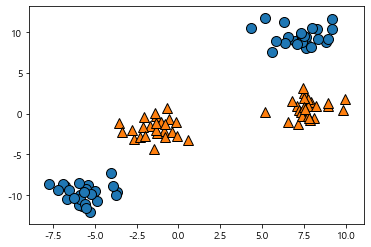

In [15]:
import sklearn

X, y = sklearn.datasets.make_blobs(centers=4, random_state=8)
y = y % 2 # 걍 짝, 홀로 나눠준듯
mglearn.discrete_scatter(X[:,0], X[:,1], y)

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


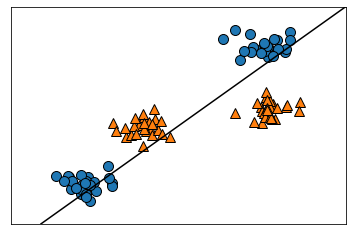

In [24]:
from sklearn.svm import LinearSVC #SVC_ 분류를 위해서 선형모델을 사용하겠다.
linear_svc = LinearSVC().fit(X, y)

mglearn.discrete_scatter(X[:,0], X[:,1], y)
mglearn.plots.plot_2d_separator(linear_svc, X)

Text(0.5, 0, '특성1 ** 2')

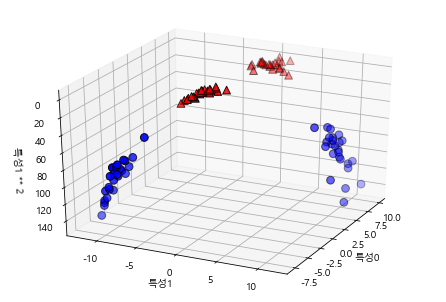

In [25]:
X_new = np.hstack([X, X[:, 1:] ** 2]) # **2 : 새로운 X값에 차원 높임

from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '특성1 ** 2')

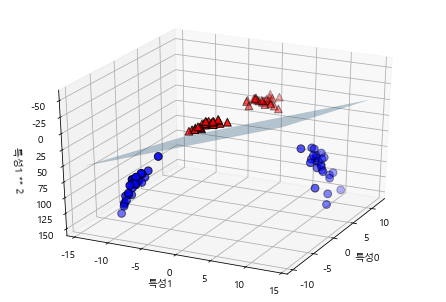

In [26]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
# 선형 결정 경계 그리기
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=60,  edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', 
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("특성0")
ax.set_ylabel("특성1")
ax.set_zlabel("특성1 ** 2")

Text(0, 0.5, '특성 1')

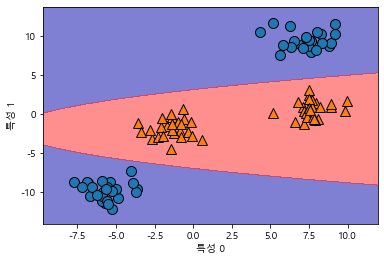

In [27]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], 
            cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

# support vector machine에서는 선형으로 해결되지 않는 것들을 커널기법을 이용하여 해결한다
# rbf(가우시안 커널기법)★
# 다항식 커널기법
# 경계선하고 가장 가까이 있는 margin 을 최대, 최소, 적정 예상

### 파라미터 : cost, gamma

In [29]:
from sklearn.svm import SVC

In [31]:
X, y = mglearn.tools.make_handcrafted_dataset()

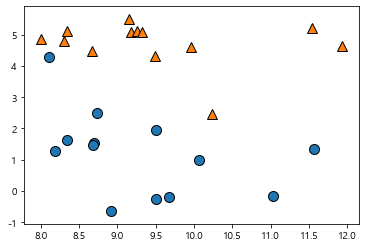

In [34]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [43]:
# 파라미터값 어떻게 조정하느냐에 따라서 어떻게 나타날까요오ㅗ오오ㅗㅇ로몽ㄹ!?
svm = SVC(kernel="rbf", C=10, gamma=0.1).fit(X, y) # kernel 어떤 알고리즘 쓸건지 지정

In [47]:
# 가장 영향력을 준 support vector 알아보기
sv = svm.support_vectors_ 
sv
# 여기 나온 5개가 경계선에 제일 가깝게 있다는거...
# 얘네 margin 계산한게

array([[ 8.1062269 ,  4.28695977],
       [ 9.50169345,  1.93824624],
       [11.563957  ,  1.3389402 ],
       [10.24028948,  2.45544401],
       [ 7.99815287,  4.8525051 ]])

Text(0, 0.5, '특성 1')

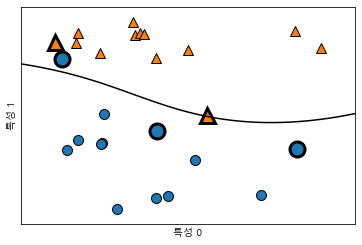

In [51]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
mglearn.plots.plot_2d_separator(svm, X, eps=0.5)

# support vector 나타내기
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("특성 0")
plt.ylabel("특성 1")

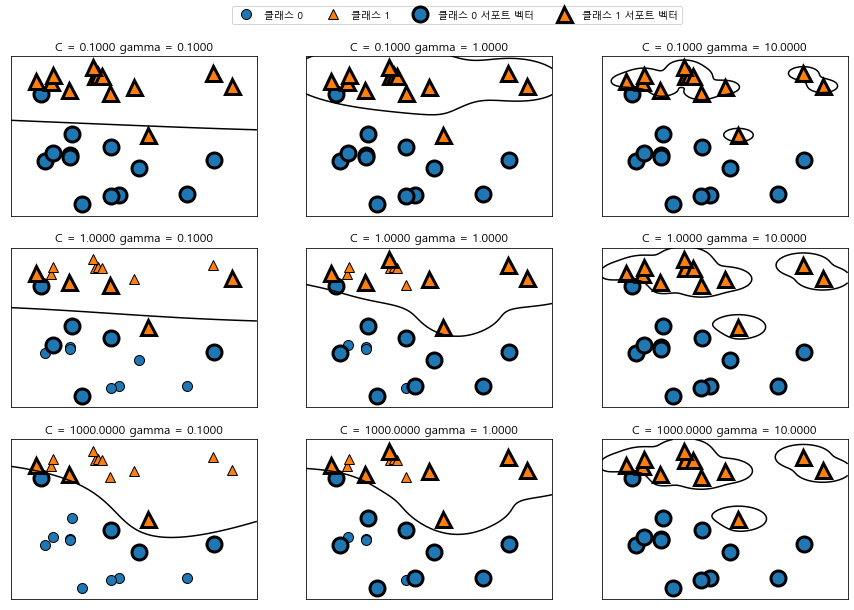

In [52]:
# 파라미터 C, gamma 값 변화에 따른 그래프 변화

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["클래스 0", "클래스 1", "클래스 0 서포트 벡터", "클래스 1 서포트 벡터"],
                 ncol=4, loc=(.9, 1.2))

# 왼쪽에서 오른쪽으로 갈수록 gamma 값 증가 : 데이터에 맞춰서 경계선 생성
# 위에서 아래로 갈수록 C 값 증가 : 데이터에 맞춰서 경계선 생성
# C, gamma 값이 증가할수록 훈련값은 증가하지만 예측값은 떨어진다. 과적합 현상 발생 

In [53]:
# 유방암 데이터셋

from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer() 
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

In [54]:
svm = SVC() # 기본값 C = 1, gamma = 1/특성의 개수(X_train.shape[1])
svm.fit(X_train, y_train)

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [56]:
print("훈련 결과 : ", svm.score(X_train, y_train)) 
print("테스트 결과 : ", svm.score(X_test, y_test)) # 상당히 실망스러운 결과.........

# SVM 는 데이터 차이값에 대해 민감하다 -> scale조절 필수

훈련 결과 :  1.0
테스트 결과 :  0.6293706293706294


In [60]:
# scale 차이 보기
df = pd.DataFrame(cancer.data)
df.columns = cancer.feature_names
df.head()

# 오.. 소수점도있고 백단위도있고 엄청나다 SVM에서는 반드시 scale조절 해줘야한다용

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
# scale 조정
## 특성별 최소값
min_on_training = X_train.min(axis=0)
min_on_training # 각 컬럼(특성)의 최소값

array([6.981e+00, 9.710e+00, 4.379e+01, 1.435e+02, 5.263e-02, 1.938e-02,
       0.000e+00, 0.000e+00, 1.060e-01, 4.996e-02, 1.115e-01, 3.628e-01,
       7.570e-01, 7.228e+00, 1.713e-03, 2.252e-03, 0.000e+00, 0.000e+00,
       7.882e-03, 8.948e-04, 7.930e+00, 1.202e+01, 5.041e+01, 1.852e+02,
       7.117e-02, 2.729e-02, 0.000e+00, 0.000e+00, 1.565e-01, 5.504e-02])

In [63]:
# scale 조정
## 특성별 범위(최대값 - 최소값)
range_on_training = (X_train - min_on_training).max(axis=0)
range_on_training

array([2.11290e+01, 2.41000e+01, 1.44710e+02, 2.35750e+03, 9.20700e-02,
       2.92020e-01, 4.26800e-01, 2.01200e-01, 1.98000e-01, 4.74800e-02,
       2.76150e+00, 4.52220e+00, 2.12230e+01, 5.34972e+02, 2.16170e-02,
       1.04148e-01, 3.96000e-01, 5.27900e-02, 5.35780e-02, 2.89452e-02,
       2.81100e+01, 3.75200e+01, 2.00790e+02, 4.06880e+03, 1.51430e-01,
       1.03071e+00, 1.25200e+00, 2.90300e-01, 5.07300e-01, 1.52460e-01])

In [64]:
# scale 조정
## 스케일 조정
X_train_scaled = (X_train - min_on_training) / range_on_training
X_test_sclaed = (X_test - min_on_training) / range_on_training

In [69]:
# 훈련시키기
svm2 = SVC().fit(X_train_scaled, y_train)

print("훈련 결과 : ", svm2.score(X_train_scaled, y_train)) 
print("테스트 결과 : ", svm2.score(X_test_sclaed, y_test)) # 오.. 위에꺼보다 좋아졌다 # 테스트 결과가 더좋아

훈련 결과 :  0.9483568075117371
테스트 결과 :  0.951048951048951


C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [72]:
# Cost로 성능 튜닝
svm1000 = SVC(C=1000).fit(X_train_scaled, y_train)

print("훈련 결과 : ", svm1000.score(X_train_scaled, y_train)) 
print("테스트 결과 : ", svm1000.score(X_test_sclaed, y_test)) # 오 더 좋아졌어 

훈련 결과 :  0.9882629107981221
테스트 결과 :  0.972027972027972


C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [78]:
# 붓꽃 데이터
iris = sklearn.datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [79]:
svm = SVC().fit(X_train, y_train)

print("훈련 결과 : ", svm.score(X_train, y_train)) 
print("테스트 결과 : ", svm.score(X_test, y_test))

훈련 결과 :  0.9714285714285714
테스트 결과 :  0.9777777777777777


C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [83]:
# 농구선수의 포지션 예측
df = pd.read_csv("data/basketball_stat.csv")
df.head()

df.Pos.value_counts()

C     50
SG    50
Name: Pos, dtype: int64

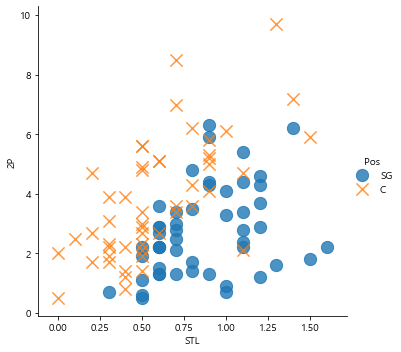

In [84]:
# 불필요한 특성을 구분하기위한 시각화
# -------------------------------------

# 스틸(STL), 2점슛(2P)
sns.lmplot("STL", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], 
          scatter_kws={"s":150})

# 데이터 분포 복잡 / 분리하기 힘듦 -> 안쓸거야

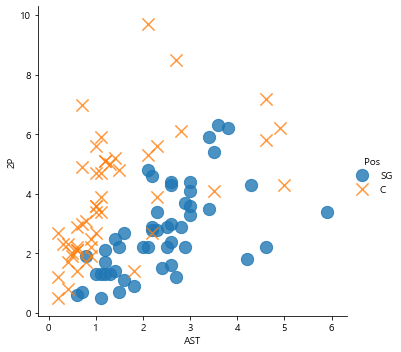

In [85]:
# 어시스트(AST)의 2점슛(2P)

sns.lmplot("AST", "2P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], 
          scatter_kws={"s":150})

# 분류하기에 뚜렷한 특징을 가지고 있지않음 -> 안쓸거야

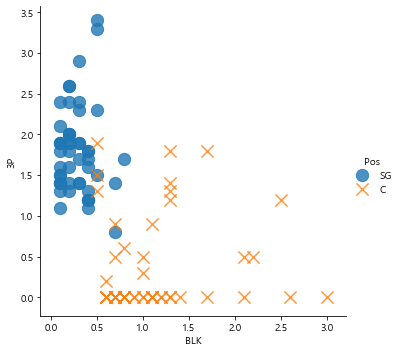

In [86]:
# 블락킹(BLK)하고 3점슛(3P)

sns.lmplot("BLK", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], 
          scatter_kws={"s":150})

# 나름 분류하기 괜찮음 / 뚜렷한 특징을 가지고있다 -> 괜찮네

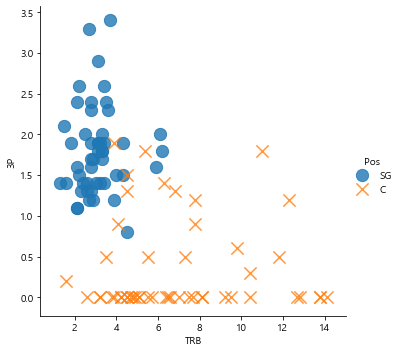

In [87]:
# 리바운드(TRB)하고 3점슛(3P)

sns.lmplot("TRB", "3P", data=df, fit_reg=False, hue="Pos", markers=["o", "x"], 
          scatter_kws={"s":150})

# 나름 분류하기 괜찮음 / 어느 정도 뚜렷한 특징을 가지고있다 -> 괜찮네

In [88]:
# 불필요한 특성 제거
df.drop(["2P", "AST", "STL"], axis=1, inplace=True) 

In [89]:
# 특성 제거 되었는지 확인 
df

,Player,Pos,3P,TRB,BLK
0,Alex Abrines,SG,1.4,1.3,0.1
1,Steven Adams,C,0.0,7.7,1.0
2,Alexis Ajinca,C,0.0,4.5,0.6
3,Chris Andersen,C,0.0,2.6,0.6
4,Will Barton,SG,1.5,4.3,0.5
...,...,...,...,...,...
95,Nikola Vucevic,C,0.3,10.4,1.0
96,Dwyane Wade,SG,0.8,4.5,0.7
97,Dion Waiters,SG,1.8,3.3,0.4
98,Hassan Whiteside,C,0.0,14.1,2.1


In [129]:
train, test = train_test_split(df, test_size=0.2) # 전체중 train용 80%, test용 20%

In [130]:
# 파일로 저장(직렬화)
import pickle 

## 훈련용
with open("data/basketball_train.pkl", "wb") as train_data:
    pickle.dump(train, train_data)   # wb : 1byte씩 쪼개서 저장

## 테스트용
with open("data/basketball_test.pkl", "wb") as test_data:
    pickle.dump(test, test_data)      

In [131]:
# 파일 불러오기

## 훈련용
with open("data/basketball_train.pkl", "rb") as train_data:
    train = pickle.load(train_data)   

## 테스트용
with open("data/basketball_test.pkl", "rb") as test_data:
    test = pickle.load(test_data)      

In [132]:
# SVM의 파라미터 찾기
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [133]:
X_train = train[["3P", "BLK"]]
y_train = train["Pos"]

# 파라미터 찾기위해서 list로 넣어주기
svm_parameters = [{"kernel":["rbf"], "gamma":[0.0000, 0.0001, 0.001, 0.1, 1], 
                                             "C":[0.01, 0.1, 1, 10, 100, 1000]}]

# 최적의 파라미터값 찾기
svm = GridSearchCV(SVC(), svm_parameters, cv=10).fit(X_train, y_train) # SVC() : 어떤 알고리즘 쓸것인지
# CV(Cross Valid) : 전체를 등분하여 번갈아가며 test, train으로 나누어 성능 알아보기

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [138]:
print(svm.best_params_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [139]:
# 테스트
X_test = test[["3P", "BLK"]]
y_test = test["Pos"]

pred = svm.predict(X_test)

print("정확도 : ", accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

정확도 :  0.85
              precision    recall  f1-score   support

           C       1.00      0.79      0.88        14
          SG       0.67      1.00      0.80         6

    accuracy                           0.85        20
   macro avg       0.83      0.89      0.84        20
weighted avg       0.90      0.85      0.86        20



In [142]:
df_compare = pd.DataFrame({"prediction":pred, "truth":y_test})
df_compare # 뭐가 맞고 틀렸는지 알아보자

,prediction,truth
9,C,C
99,SG,SG
24,C,C
11,C,C
67,SG,SG
54,SG,C
88,SG,SG
38,C,C
29,SG,C
33,C,C


In [143]:
# MNIST 데이터를 이용한 SW
# 4-3 이미지내부의 문자인식(p.181)
# train 6만장 / test 1만장 씩 들어있는 폴더 생성
# (p.183 - 184)

import urllib.request as req
import gzip, os, os.path
savepath = "./data/mnist" # mnist 폴더 생성
baseurl = "http://yann.lecun.com/exdb/mnist"
files = ["train-images-idx3-ubyte.gz","train-labels-idx1-ubyte.gz","t10k-images-idx3-ubyte.gz","t10k-labels-idx1-ubyte.gz"]
# 다운로드
if not os.path.exists(savepath): os.mkdir(savepath)
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)
# GZip 압축 해제
for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:", f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("ok")

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
ok


In [144]:
# 반디집 가서 꿀뷰 깔아주기 

import struct
def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./data/mnist/"+name+"-labels-idx1-ubyte", "rb") 
    img_f = open("./data/mnist/"+name+"-images-idx3-ubyte", "rb")
    
    # Bit Map
    # : P(Potable)BM : 한 픽셀을 1bit로 표현 / 흑백
    # : PG(Gray)M : 한 픽셀을 1byte로 표현 / 검정색의 농도가 있는 흑백
    # : PPM : 한 픽셀을 3byt로 표현 / RGB
    
    csv_f = open("./data/mnist/"+name+".csv", "w", encoding="utf-8")
    # 헤더 정보 읽기 --- (※1)
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    
    # header
    # : magicNumber
    # : 파일크기
    # : 최대 표현값
    
    # s = (magicNumber, 크기, 색 표현 크기)

    # P1, P4 : PBM
    # P2, P5 : PGM
    # P3, P6 : PPM

    # 크기  : 28*28
    # 2^8 색의 표현 크기
    # 그래서 확장자 .pgm으로 되어있음 
    
    
    # 이미지 데이터를 읽고 CSV로 저장하기 --- (※2)
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata = img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기 -- (※3)
        if idx < 10:
            s = "P2 28 28 255\n"
            s += " ".join(sdata)
            iname = "./data/mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()
    
    
# 결과를 파일로 출력하기 --- (※4)
to_csv("train", 10000)
to_csv("t10k", 500)

In [146]:
# 

from sklearn import model_selection, svm, metrics

def load_csv(fname):
    labels = []
    images = []
    
    with open(fname, "r") as f:
        for line in f:
            cols = line.split(",")
            if len(cols) < 2:
                continue
            
            labels.append(int(cols.pop(0)))
            
            vals = list(map(lambda n:int(n)/256, cols))
            images.append(vals)
    return {"labels":labels, "images":images}

data = load_csv("./data/mnist/train.csv")
test = load_csv("./data/mnist/t10k.csv")

In [149]:
print(data["images"][2])
print(data["labels"][2])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.26171875, 0.90625, 0.15234375, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2421875, 0.31640625, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.46875, 0.703125, 0.1523437

In [150]:
# 학습하기
model = SVC().fit(data["images"], data["labels"])

C:\Users\acorn\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [151]:
# 예측
pred = model.predict(test["images"])

In [152]:
# 결과 확인
ac_score = accuracy_score(test["labels"], pred)
print("정확도 ; ", ac_score)

정확도 ;  0.9161676646706587


In [153]:
print(classification_report(test["labels"], pred))

              precision    recall  f1-score   support

           0       0.89      0.95      0.92        42
           1       0.97      1.00      0.99        67
           2       0.96      0.89      0.92        55
           3       0.93      0.85      0.89        46
           4       0.90      0.96      0.93        55
           5       0.84      0.92      0.88        50
           6       0.97      0.86      0.91        43
           7       0.87      0.92      0.89        49
           8       0.90      0.88      0.89        40
           9       0.94      0.89      0.91        54

    accuracy                           0.92       501
   macro avg       0.92      0.91      0.91       501
weighted avg       0.92      0.92      0.92       501



In [155]:
pred1 = model.predict([test["images"][500]])
pred1

array([3])

In [156]:
print(test["labels"][500])

3


In [157]:
input_form = """
<table>
<td style="border-style: none;">
<div style="border: solid 2px #666; width: 143px; height: 144px;">
<canvas width="140" height="140"></canvas>
</div></td>
<td style="border-style: none;">
<button onclick="clear_value()">Clear</button>
</td>
</table>
"""

javascript = """
<script type="text/Javascript">
    var pixels = [];
    for (var i = 0; i < 28*28; i++) pixels[i] = 0
    var click = 0;
    var canvas = document.querySelector("canvas");
    canvas.addEventListener("mousemove", function(e){
        if (e.buttons == 1) {
            click = 1;
            canvas.getContext("2d").fillStyle = "rgb(0,0,0)";
            canvas.getContext("2d").fillRect(e.offsetX, e.offsetY, 8, 8);
            x = Math.floor(e.offsetY * 0.2)
            y = Math.floor(e.offsetX * 0.2) + 1
            for (var dy = 0; dy < 2; dy++){
                for (var dx = 0; dx < 2; dx++){
                    if ((x + dx < 28) && (y + dy < 28)){
                        pixels[(y+dy)+(x+dx)*28] = 1
                    }
                }
            }
        } else {
            if (click == 1) set_value()
            click = 0;
        }
    });
    
    function set_value(){
        var result = ""
        for (var i = 0; i < 28*28; i++) result += pixels[i] + ","
        var kernel = IPython.notebook.kernel;
        kernel.execute("image = [" + result + "]");
    }
    
    function clear_value(){
        canvas.getContext("2d").fillStyle = "rgb(255,255,255)";
        canvas.getContext("2d").fillRect(0, 0, 140, 140);
        for (var i = 0; i < 28*28; i++) pixels[i] = 0
    }
</script>

"""

In [ ]:
# 위에꺼 설명

    # <canvas width="140" height="140"></canvas>   : 가로세로 높이 정하기

    # 숫자쓰는건 Javascript로 구현

    # var kernel = IPython.notebook.kernel;     : 자바스크립트로 작성된 값을 이미지로 만들어주기 

In [166]:
from IPython.display import HTML
HTML(input_form + javascript)

# 3이라고 쓰고 밑에 print(image) 시키면 3이라는 이미지가 나타나게됨
# python 에 대한 결과값이 픽셀을 이미지 크기만큼 만들어줌

In [167]:
print(image)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [168]:
# 무슨숫자 썼는지 맞춰보기
pred2 = model.predict([image])
pred2

# 예측을 잘 못한다는것은 과적합

array([5])